# "COVID-19 India Matplotlib Overview"
> "Tracking coronavirus total cases, deaths and new cases in India"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jagriti Goswami
- categories: [fastpages, jupyter]

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide
dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')

In [3]:
#hide
dft_cases.head()

states  14-Mar-20  15-Mar-20  16-Mar-20  17-Mar-20  \
0  Andaman and Nicobar Islands          0          0          0          0   
1               Andhra Pradesh          1          1          1          1   
2            Arunachal Pradesh          0          0          0          0   
3                        Assam          0          0          0          0   
4                        Bihar          0          0          0          0   

   18-Mar-20  19-Mar-20  20-Mar-20  21-Mar-20  22-Mar-20  ...  19-Jul-20  \
0          0          0          0          0          0  ...        199   
1          1          3          3          5          6  ...      49650   
2          0          0          0          0          0  ...        740   
3          0          0          0          0          0  ...      23898   
4          0          0          0          0          2  ...      26379   

   20-Jul-20  21-Jul-20  22-Jul-20  23-Jul-20  24-Jul-20  25-Jul-20  \
0        203        208        217        236        255        286   
1      53724      58668      64713      72711      80858      88671   
2        790        858        949        991       1056       1126   
3      24991      26671      27643      28690      29820      30985   
4      27455      28564      30066      31691      33511      36314   

   26-Jul-20  27-Jul-20  28-Jul-20  
0        314        334        359  
1      96298     102349     110297  
2       1158       1239       1330  
3      32127      33475      34846  
4      38919      41111      43591  

[5 rows x 138 columns]

In [4]:
#hide
# your code here 
dt_today = '28-Jul-20'
dt_yday = '27-Jul-20'

In [5]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [6]:
#hide
# your code here
df = pd.concat([dfc_cases, dfp_cases, dfc_deaths, dfp_deaths],axis=1)
df.columns = ['Cases', 'PCases', 'Deaths', 'PDeaths']
df_table = df.sort_values(['Cases','Deaths'], ascending = [False, False])

In [7]:
#hide
df_table.head()

Cases  PCases  Deaths  PDeaths
states                                         
Maharashtra     391440  383723   14164    13882
Tamil Nadu      227688  220716    3659     3571
Delhi           132275  131219    3881     3853
Andhra Pradesh  110297  102349    1148     1090
Karnataka       107001  101465    2064     1962

In [8]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [9]:
#hide
df_table

Cases  PCases  Deaths  PDeaths  Cases (+)  \
states                                                                    
Maharashtra                  391440  383723   14164    13882       7717   
Tamil Nadu                   227688  220716    3659     3571       6972   
Delhi                        132275  131219    3881     3853       1056   
Andhra Pradesh               110297  102349    1148     1090       7948   
Karnataka                    107001  101465    2064     1962       5536   
Uttar Pradesh                 73951   70493    1497     1456       3458   
West Bengal                   62964   60830    1449     1411       2134   
Gujarat                       57982   56874    2372     2348       1108   
Telangana                     57142   55532     480      471       1610   
Bihar                         43591   41111     269      255       2480   
Rajasthan                     38636   37564     644      633       1072   
Assam                         34846   33475      92       90       1371   
Haryana                       32876   32127     406      397        749   
Madhya Pradesh                29217   28589     831      821        628   
Orissa                        28107   26892     189      181       1215   
Kerala                        20895   19728      68       64       1167   
Jammu and Kashmir             18879   18390     333      321        489   
Punjab                        14378   13769     336      318        609   
Jharkhand                      9563    8803      94       90        760   
Goa                            5287    5119      36       36        168   
Tripura                        4287    4066      21       17        221   
Pondicherry                    3013    2874      47       43        139   
Himachal Pradesh               2330    2270      13       13         60   
Manipur                        2317    2286       0        0         31   
Nagaland                       1460    1385       4        5         75   
Arunachal Pradesh              1330    1239       3        3         91   
Chandigarh                      934     910      14       14         24   
Meghalaya                       779     738       5        5         41   
Sikkim                          592     568       1        1         24   
Mizoram                         384     361       0        0         23   
Andaman and Nicobar Islands     359     334       1        1         25   
Daman and Diu                     0       0       0        0          0   
Lakshadweep                       0       0       0        0          0   

                             Deaths (+)  Fatality Rate  
states                                                  
Maharashtra                         282           3.62  
Tamil Nadu                           88           1.61  
Delhi                                28           2.93  
Andhra Pradesh                       58           1.04  
Karnataka                           102           1.93  
Uttar Pradesh                        41           2.02  
West Bengal                          38           2.30  
Gujarat                              24           4.09  
Telangana                             9           0.84  
Bihar                                14           0.62  
Rajasthan                            11           1.67  
Assam                                 2           0.26  
Haryana                               9           1.23  
Madhya Pradesh                       10           2.84  
Orissa                                8           0.67  
Kerala                                4           0.33  
Jammu and Kashmir                    12           1.76  
Punjab                               18           2.34  
Jharkhand                             4           0.98  
Goa                                   0           0.68  
Tripura                               4           0.49  
Pondicherry                           4           1.56  
Himachal Pradesh                    

In [10]:
#hide
# your code here
summary = {'updated': '28th July, 2020', 'since': '27th July, 2020', 'Cases': df_table['Cases'].sum(),'PCases': df_table['PCases'].sum(), 'Deaths': df_table['Deaths'].sum(),'PDeaths': df_table['PDeaths'].sum(),'Cases (+)': df_table['Cases (+)'].sum(), 'Deaths (+)':df_table['Deaths (+)'].sum()}
summary

{'updated': '28th July, 2020',
 'since': '27th July, 2020',
 'Cases': 1514800,
 'PCases': 1465799,
 'Deaths': 34121,
 'PDeaths': 33352,
 'Cases (+)': 49001,
 'Deaths (+)': 770}

In [11]:
#hide_input
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [12]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [13]:
#hide
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = '28-Jul-20', ascending = False,inplace = True)

In [14]:
#hide
dft_ct_new_cases.head()

14-Mar-20  15-Mar-20  16-Mar-20  17-Mar-20  18-Mar-20  \
states                                                                  
Andhra Pradesh          0          0          0          0          0   
Maharashtra             0         18          6          3          3   
Tamil Nadu              0          0          0          0          1   
Karnataka               0          0          1          2          5   
Uttar Pradesh           0          1          0          2          2   

                19-Mar-20  20-Mar-20  21-Mar-20  22-Mar-20  23-Mar-20  ...  \
states                                                                 ...   
Andhra Pradesh          2          0          2          1          1  ...   
Maharashtra             4          4         12         10         23  ...   
Tamil Nadu              1          0          3          3          3  ...   
Karnataka               1          0          5          6          7  ...   
Uttar Pradesh           3          4          4          2          2  ...   

                19-Jul-20  20-Jul-20  21-Jul-20  22-Jul-20  23-Jul-20  \
states                                                                  
Andhra Pradesh       5041       4074       4944       6045       7998   
Maharashtra          9518       8240       8336      10576       9895   
Tamil Nadu           4979       4985       4965       5849       6472   
Karnataka            4120       3648       3649       4764       5030   
Uttar Pradesh        2211       1913       2128       2300       2516   

                24-Jul-20  25-Jul-20  26-Jul-20  27-Jul-20  28-Jul-20  
states                                                                 
Andhra Pradesh       8147       7813       7627       6051       7948  
Maharashtra          9615       9251       9431       7924       7717  
Tamil Nadu           6785       6988       6986       6993       6972  
Karnataka            5007       5072       5199       5324       5536  
Uttar Pradesh        2667       2971       3246       3505       3458  

[5 rows x 137 columns]

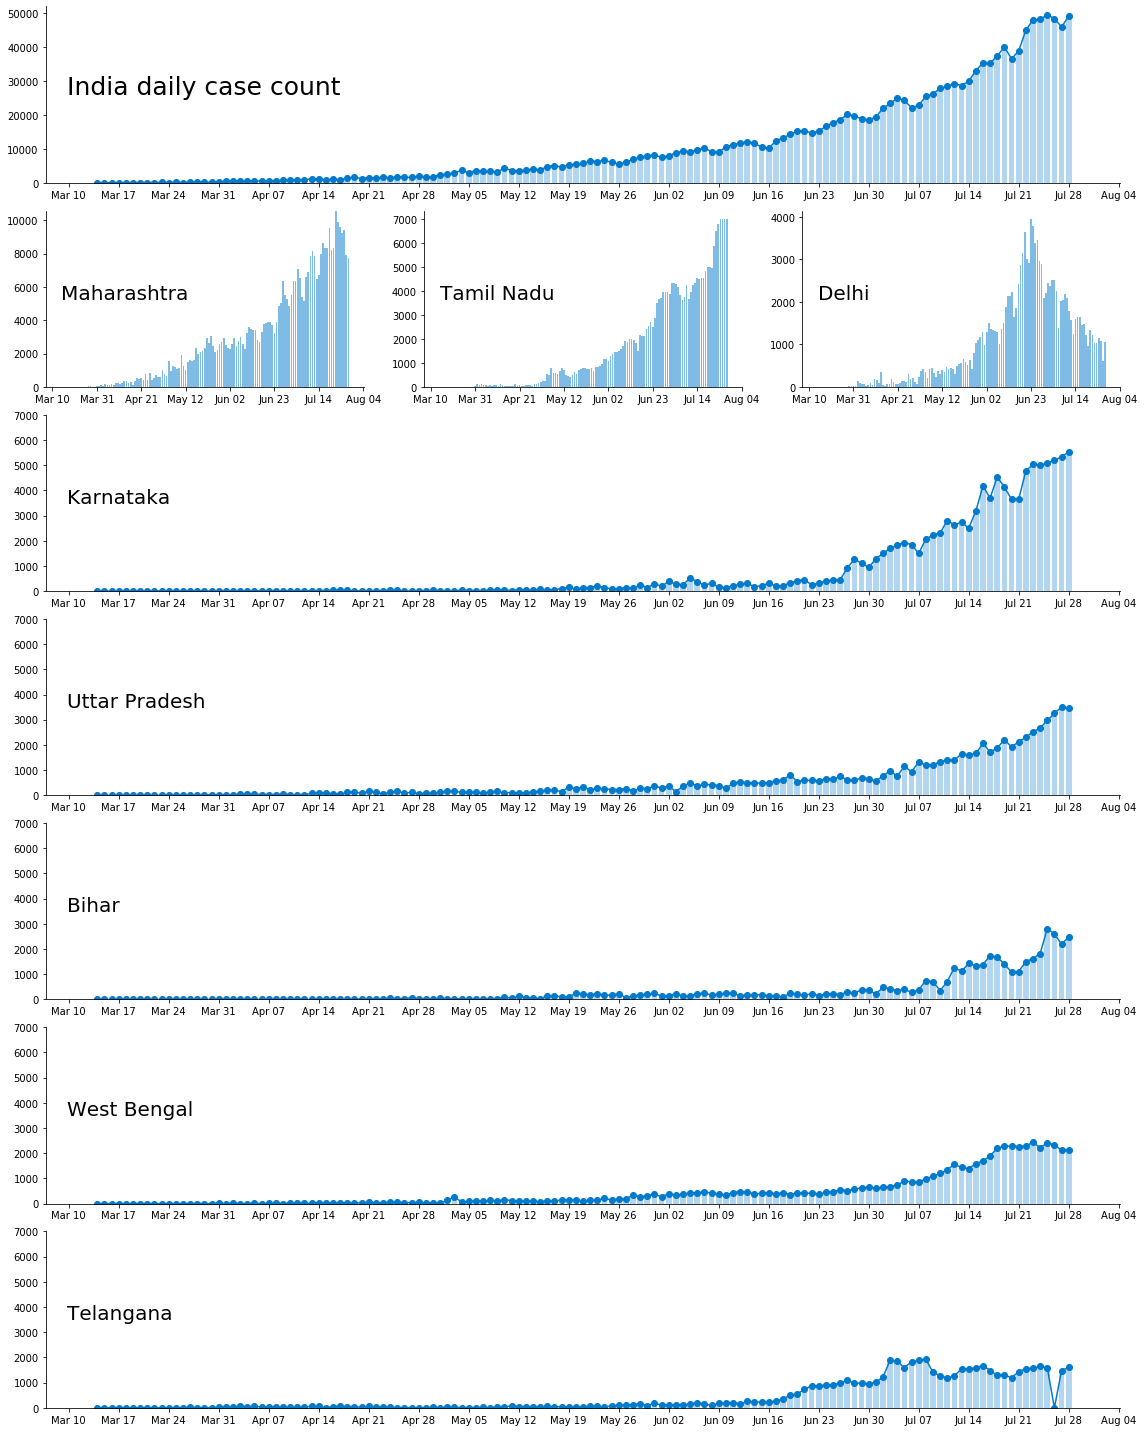

In [15]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [16]:
#hide_input
print(df_table.to_string(index=False))

  Cases  PCases  Deaths  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
 391440  383723   14164    13882       7717         282           3.62
 227688  220716    3659     3571       6972          88           1.61
 132275  131219    3881     3853       1056          28           2.93
 110297  102349    1148     1090       7948          58           1.04
 107001  101465    2064     1962       5536         102           1.93
  73951   70493    1497     1456       3458          41           2.02
  62964   60830    1449     1411       2134          38           2.30
  57982   56874    2372     2348       1108          24           4.09
  57142   55532     480      471       1610           9           0.84
  43591   41111     269      255       2480          14           0.62
  38636   37564     644      633       1072          11           1.67
  34846   33475      92       90       1371           2           0.26
  32876   32127     406      397        749           9           1.23
  2921